In [46]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
import re 
import string 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import spacy
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS
from string import punctuation

In [4]:
# setting pandas agar kolom tidak terpotong
pd.set_option('display.max_colwidth', None)

In [23]:
# load data
data_raw1 = pd.read_csv('Dataset/asuransi.csv', sep=';')
data_raw2 = pd.read_csv('Dataset/asuransi_allianz.csv', sep=';')
data_raw3 = pd.read_csv('Dataset/asuransi_prudential.csv', sep=';')
#data_raw4 = pd.read_csv('Dataset/asuransi_aia.csv', sep=';')
data_raw5 = pd.read_csv('Dataset/asuransi_manulife.csv', sep=';')
#data_raw6 = pd.read_csv('Dataset/asuransi_cigna.csv', sep=';')
#data_raw7 = pd.read_csv('Dataset/asuransi_bni.csv', sep=';')
data_raw8 = pd.read_csv('Dataset/asuransi_swasta.csv', sep=';')

In [24]:
# concat data
data_raw = pd.concat([data_raw1, data_raw2, data_raw3, data_raw5, data_raw8], axis=0)
data_raw = data_raw.reset_index(drop=True)
data_raw.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Sep 24 03:59:53 +0000 2023,1705794155526676702,@morninghae_ Gue kasian kuping dia juga mbak2 translator itu harus punya asuransi kesehatan telinga kalo jadi translator SUJU dan asuransi kesehatan jiwa hahahahahahah Emang kudu satu2 ya translator mereka 😅😅😅,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,Sun Sep 24 03:53:01 +0000 2023,1705792427209240785,"@worksfess Kerjaan enak, deket suami &amp keluarga, gaji di atas umr setempat, ada asuransi kesehatan dr kantor, atasan baek dan selow Kalo rekan kerja? ngga terlalu mikirin sih, niat kerja cari uang, yg lain2 abaikan",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785
2,Sun Sep 24 03:32:30 +0000 2023,1705787263639322979,@m00nwarrior Yang penting dapat umr plus bonus dan asuransi kesehatan,0,1,0,0,in,271273146,1705588574064988328,Bukan_sp_sp,https://twitter.com/Bukan_sp_sp/status/1705787263639322979
3,Sun Sep 24 01:30:32 +0000 2023,1705756571756908790,@Safa_Andriana Bacakan tanda bintang (*) Syarat dan ketentuan berlaku Spt 1.Wajib pnya asuransi kesehatan dan jiwa serta warisan trsembunyi dr istri dan anak sah sbesar x milyar. 2.Kondisi kesehatan kanker stadium 4 atau jantung 2 ring 😎😎,0,0,0,0,in,147534865,1705584263364776423,TwiteX2010,https://twitter.com/TwiteX2010/status/1705756571756908790
4,Sat Sep 23 17:39:04 +0000 2023,1705637921087434847,"@worksfess Buatin akun dana pensiun buat orang tua aja nder kalo ortumu gamau dikasih, atau bisa juga beliin asuransi kesehatan kalo belum punya, atau buka rekening untuk liburan keluarga. Ngasih orang tua itu ga harus, tapi kalo mau ngebahagiain orang tua juga baik🫶",0,0,0,0,in,2259784158,1705499230276862366,PupuJuniar,https://twitter.com/PupuJuniar/status/1705637921087434847


In [65]:
df = data_raw.copy()

In [66]:
# sum duplicate data
df.duplicated().sum()

107

In [67]:
# drop duplicate
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Sep 24 03:59:53 +0000 2023,1705794155526676702,@morninghae_ Gue kasian kuping dia juga mbak2 translator itu harus punya asuransi kesehatan telinga kalo jadi translator SUJU dan asuransi kesehatan jiwa hahahahahahah Emang kudu satu2 ya translator mereka 😅😅😅,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,Sun Sep 24 03:53:01 +0000 2023,1705792427209240785,"@worksfess Kerjaan enak, deket suami &amp keluarga, gaji di atas umr setempat, ada asuransi kesehatan dr kantor, atasan baek dan selow Kalo rekan kerja? ngga terlalu mikirin sih, niat kerja cari uang, yg lain2 abaikan",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785
2,Sun Sep 24 03:32:30 +0000 2023,1705787263639322979,@m00nwarrior Yang penting dapat umr plus bonus dan asuransi kesehatan,0,1,0,0,in,271273146,1705588574064988328,Bukan_sp_sp,https://twitter.com/Bukan_sp_sp/status/1705787263639322979
3,Sun Sep 24 01:30:32 +0000 2023,1705756571756908790,@Safa_Andriana Bacakan tanda bintang (*) Syarat dan ketentuan berlaku Spt 1.Wajib pnya asuransi kesehatan dan jiwa serta warisan trsembunyi dr istri dan anak sah sbesar x milyar. 2.Kondisi kesehatan kanker stadium 4 atau jantung 2 ring 😎😎,0,0,0,0,in,147534865,1705584263364776423,TwiteX2010,https://twitter.com/TwiteX2010/status/1705756571756908790
4,Sat Sep 23 17:39:04 +0000 2023,1705637921087434847,"@worksfess Buatin akun dana pensiun buat orang tua aja nder kalo ortumu gamau dikasih, atau bisa juga beliin asuransi kesehatan kalo belum punya, atau buka rekening untuk liburan keluarga. Ngasih orang tua itu ga harus, tapi kalo mau ngebahagiain orang tua juga baik🫶",0,0,0,0,in,2259784158,1705499230276862366,PupuJuniar,https://twitter.com/PupuJuniar/status/1705637921087434847


In [68]:
# jumlah data
print('Jumlah data: ', len(df))

Jumlah data:  3014


In [69]:
# info data
print('Info data: ')
print(df.info())

Info data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           3014 non-null   object
 1   id_str               3014 non-null   int64 
 2   full_text            3014 non-null   object
 3   quote_count          3014 non-null   int64 
 4   reply_count          3014 non-null   int64 
 5   retweet_count        3014 non-null   int64 
 6   favorite_count       3014 non-null   int64 
 7   lang                 3014 non-null   object
 8   user_id_str          3014 non-null   int64 
 9   conversation_id_str  3014 non-null   int64 
 10  username             3014 non-null   object
 11  tweet_url            3014 non-null   object
dtypes: int64(7), object(5)
memory usage: 282.7+ KB
None


# Data Processing

## Data Transformation

In [70]:
# mengubah tipe data kolom created_at menjadi datetime
df['created_at'] = pd.to_datetime(df['created_at'])

C:\Users\MobileLegend\AppData\Local\Temp\ipykernel_12016\2817513518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   created_at           3014 non-null   datetime64[ns, UTC]
 1   id_str               3014 non-null   int64              
 2   full_text            3014 non-null   object             
 3   quote_count          3014 non-null   int64              
 4   reply_count          3014 non-null   int64              
 5   retweet_count        3014 non-null   int64              
 6   favorite_count       3014 non-null   int64              
 7   lang                 3014 non-null   object             
 8   user_id_str          3014 non-null   int64              
 9   conversation_id_str  3014 non-null   int64              
 10  username             3014 non-null   object             
 11  tweet_url            3014 non-null   object             
dtypes: datetime64[ns, UT

In [72]:
df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,@morninghae_ Gue kasian kuping dia juga mbak2 translator itu harus punya asuransi kesehatan telinga kalo jadi translator SUJU dan asuransi kesehatan jiwa hahahahahahah Emang kudu satu2 ya translator mereka 😅😅😅,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,"@worksfess Kerjaan enak, deket suami &amp keluarga, gaji di atas umr setempat, ada asuransi kesehatan dr kantor, atasan baek dan selow Kalo rekan kerja? ngga terlalu mikirin sih, niat kerja cari uang, yg lain2 abaikan",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


# Text Preprocessing

## Cleaning Text

In [73]:
# menghapus kata atau simbol atau hal yang tidak penting dan link
def remove_words(text):
    text = re.sub(r'@\S+', '', text) # menghapus link
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # menghapus simbol
    text = re.sub(r'\s+', ' ', text) # menghapus spasi berlebih
    text = text.lower() # mengubah huruf menjadi kecil
    text = re.sub(r'\d+', '', text) # menghapus angka
    text = re.sub(r'http\S+', '', text) # menghapus link
    text = re.sub(r'www\S+', '', text) # menghapus link
    text = re.sub(r'pic\S+', '', text) # menghapus link
    text = re.sub(r'pic.twitter\S+', '', text) # menghapus link
    return text

In [74]:
# menghapus kata di kolom 'text'
df['full_text'] = df['full_text'].apply(remove_words)
df.head(2)           

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,gue kasian kuping dia juga mbak translator itu harus punya asuransi kesehatan telinga kalo jadi translator suju dan asuransi kesehatan jiwa hahahahahahah emang kudu satu ya translator mereka,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,kerjaan enak deket suami amp keluarga gaji di atas umr setempat ada asuransi kesehatan dr kantor atasan baek dan selow kalo rekan kerja ngga terlalu mikirin sih niat kerja cari uang yg lain abaikan,0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


In [75]:
# tokenisasi
df['full_text'] = df['full_text'].apply(word_tokenize)

In [76]:
df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,"[gue, kasian, kuping, dia, juga, mbak, translator, itu, harus, punya, asuransi, kesehatan, telinga, kalo, jadi, translator, suju, dan, asuransi, kesehatan, jiwa, hahahahahahah, emang, kudu, satu, ya, translator, mereka]",0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,"[kerjaan, enak, deket, suami, amp, keluarga, gaji, di, atas, umr, setempat, ada, asuransi, kesehatan, dr, kantor, atasan, baek, dan, selow, kalo, rekan, kerja, ngga, terlalu, mikirin, sih, niat, kerja, cari, uang, yg, lain, abaikan]",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


In [77]:
# stopword menggunakan spacy
nlp = Indonesian()
stop_words = STOP_WORDS

# menghapus stopword
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['full_text'] = df['full_text'].apply(remove_stopwords)
df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,"[gue, kasian, kuping, mbak, translator, asuransi, kesehatan, telinga, kalo, translator, suju, asuransi, kesehatan, jiwa, hahahahahahah, emang, kudu, ya, translator]",0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,"[kerjaan, enak, deket, suami, amp, keluarga, gaji, umr, asuransi, kesehatan, dr, kantor, atasan, baek, selow, kalo, rekan, kerja, ngga, mikirin, sih, niat, kerja, cari, uang, yg, abaikan]",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


In [78]:
# stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
for document in df['full_text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

In [79]:
df['full_text'] = df['full_text'].apply(lambda x: [stemmed_wrapper(word) for word in x])
df.head(2)

In [ ]:
text = ' '.join(df['full_text'].sum())

(-0.5, 1599.5, 799.5, -0.5)

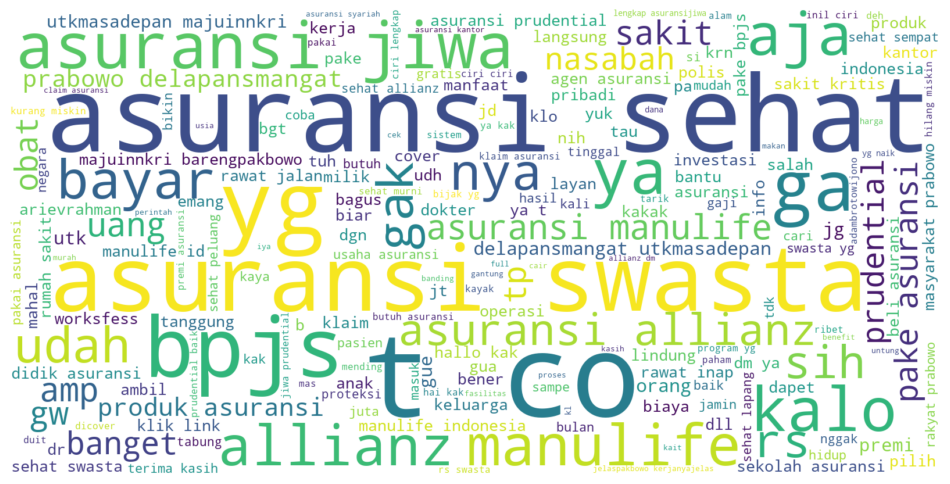

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [ ]:
# lemmatization bahasa indonesia menggunakan library spaCy
import spacy
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS
from string import punctuation

nlp = Indonesian() # load model bahasa indonesia
stopwords = list(STOP_WORDS)
stopwords[:10]


In [ ]:
# import library algoritma word2vec
from gensim.models import Word2Vec